In [1]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('..'))

from FasterRcnn.tracking import *

In [2]:
get_detections = get_rcnn_detections_fn()

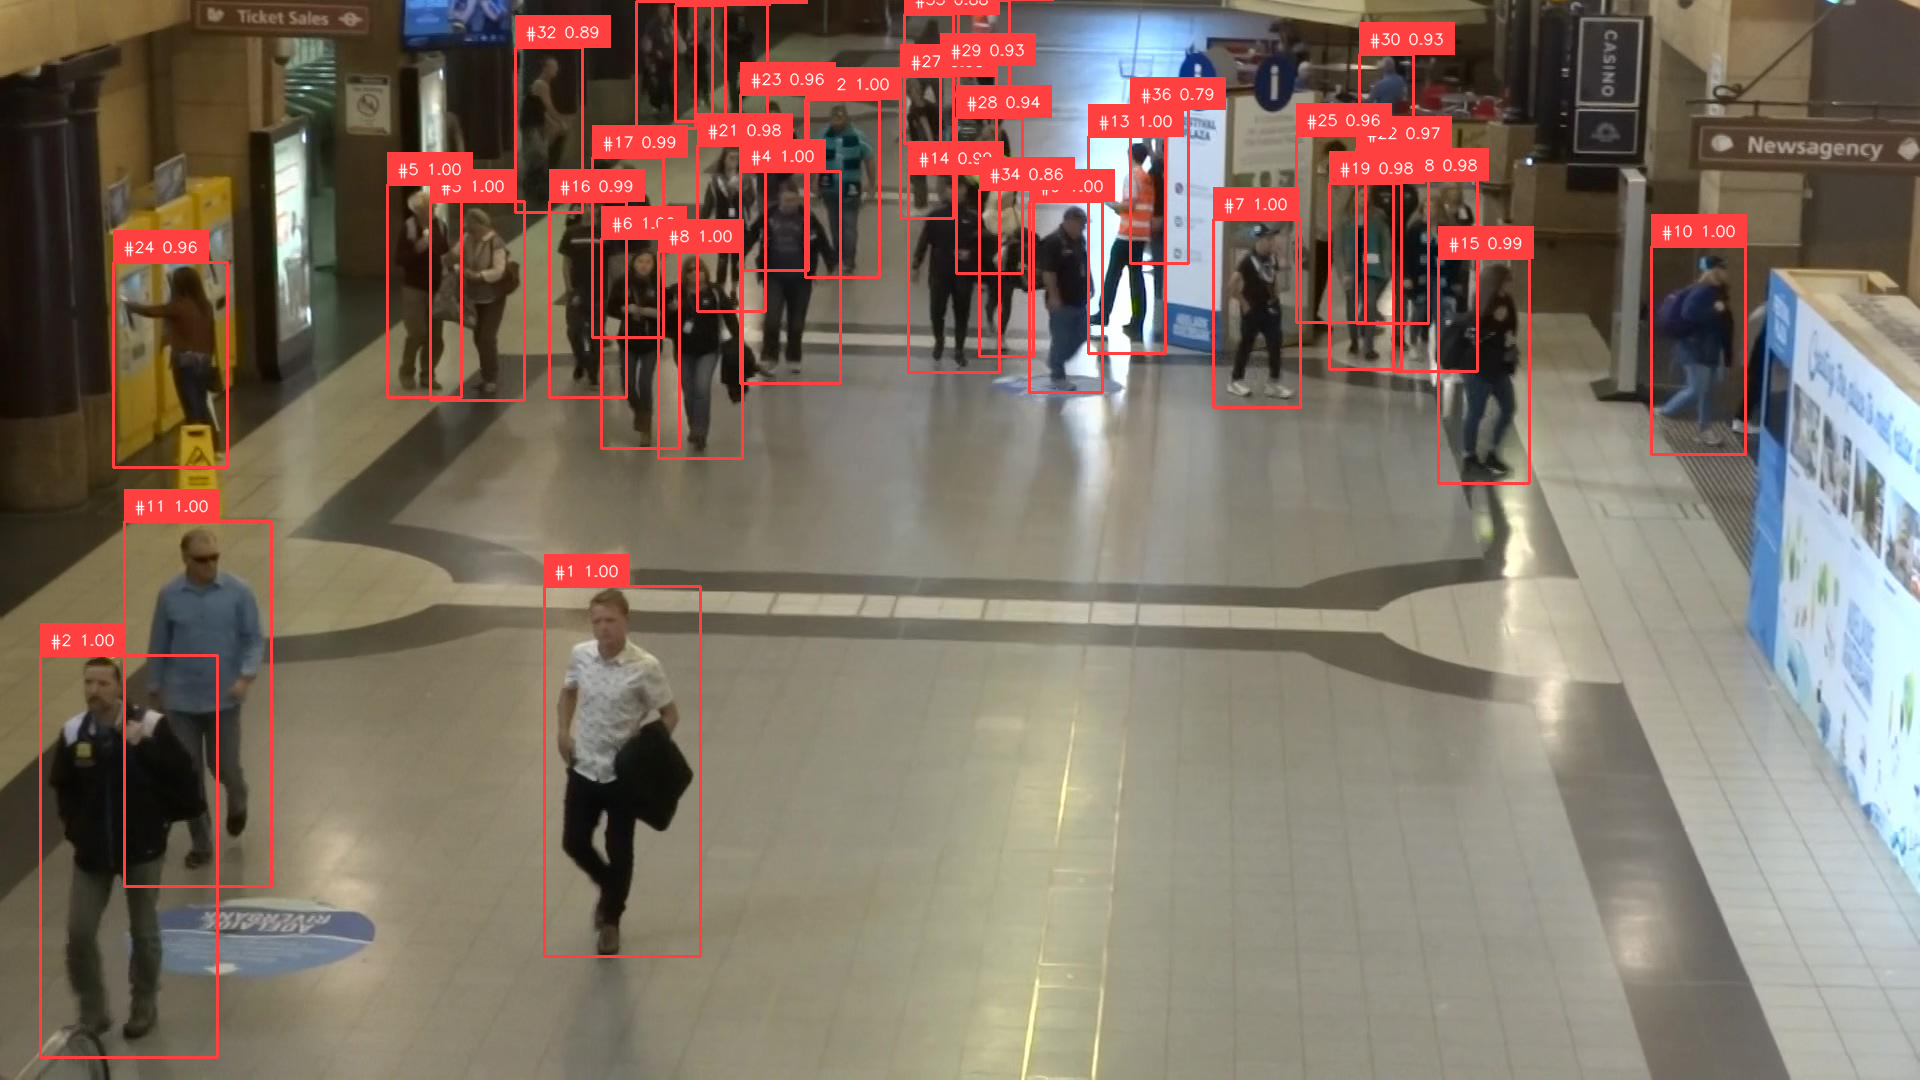

In [4]:
img = get_frame(fnum=50)

detections = get_detections(img, threshold=0.7)

draw_rcnn_detections(detections, img)

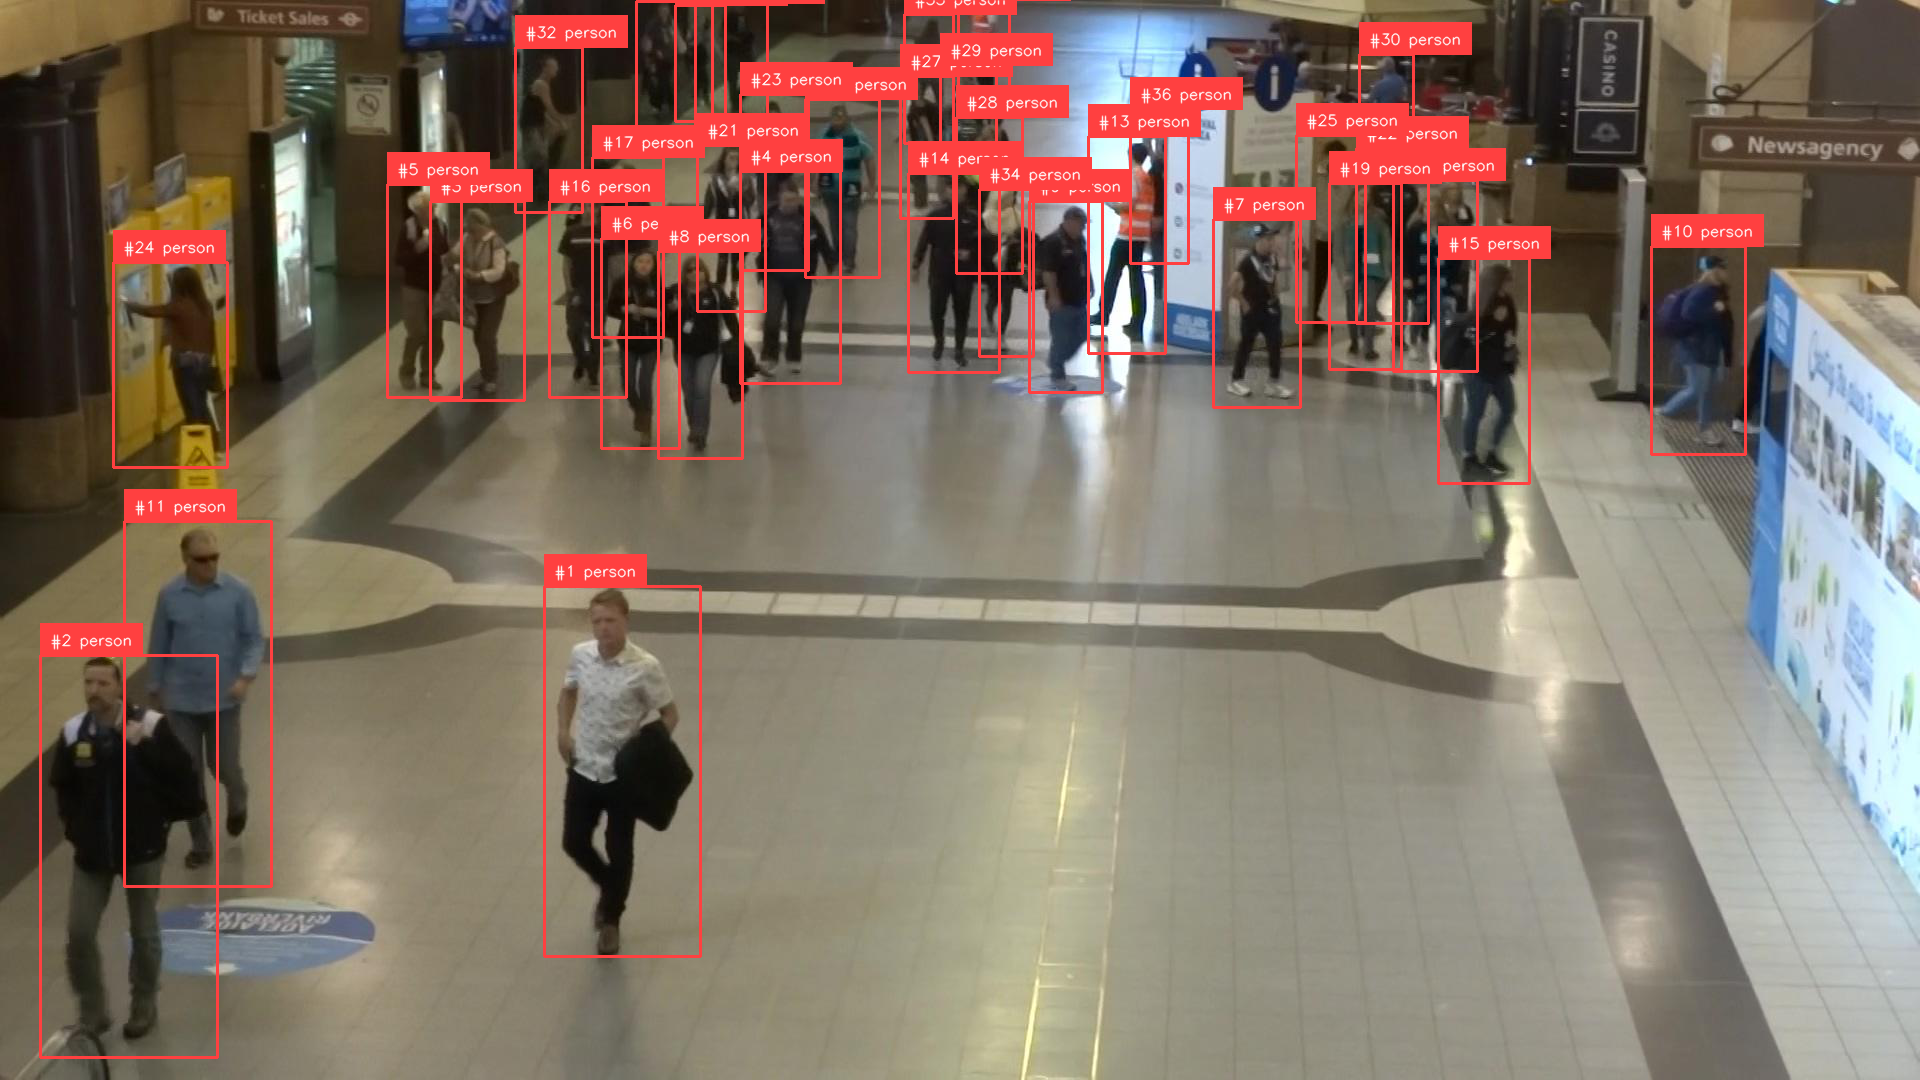

# Try on 1 Batch

In [33]:
xb = next(iter(dataloader))

In [34]:
model  = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT).to(device).type(dtype)

In [35]:
checkpoint = torch.load("../../models/fastrcnn_freeze_8batchs_3epochs.pth")

In [36]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

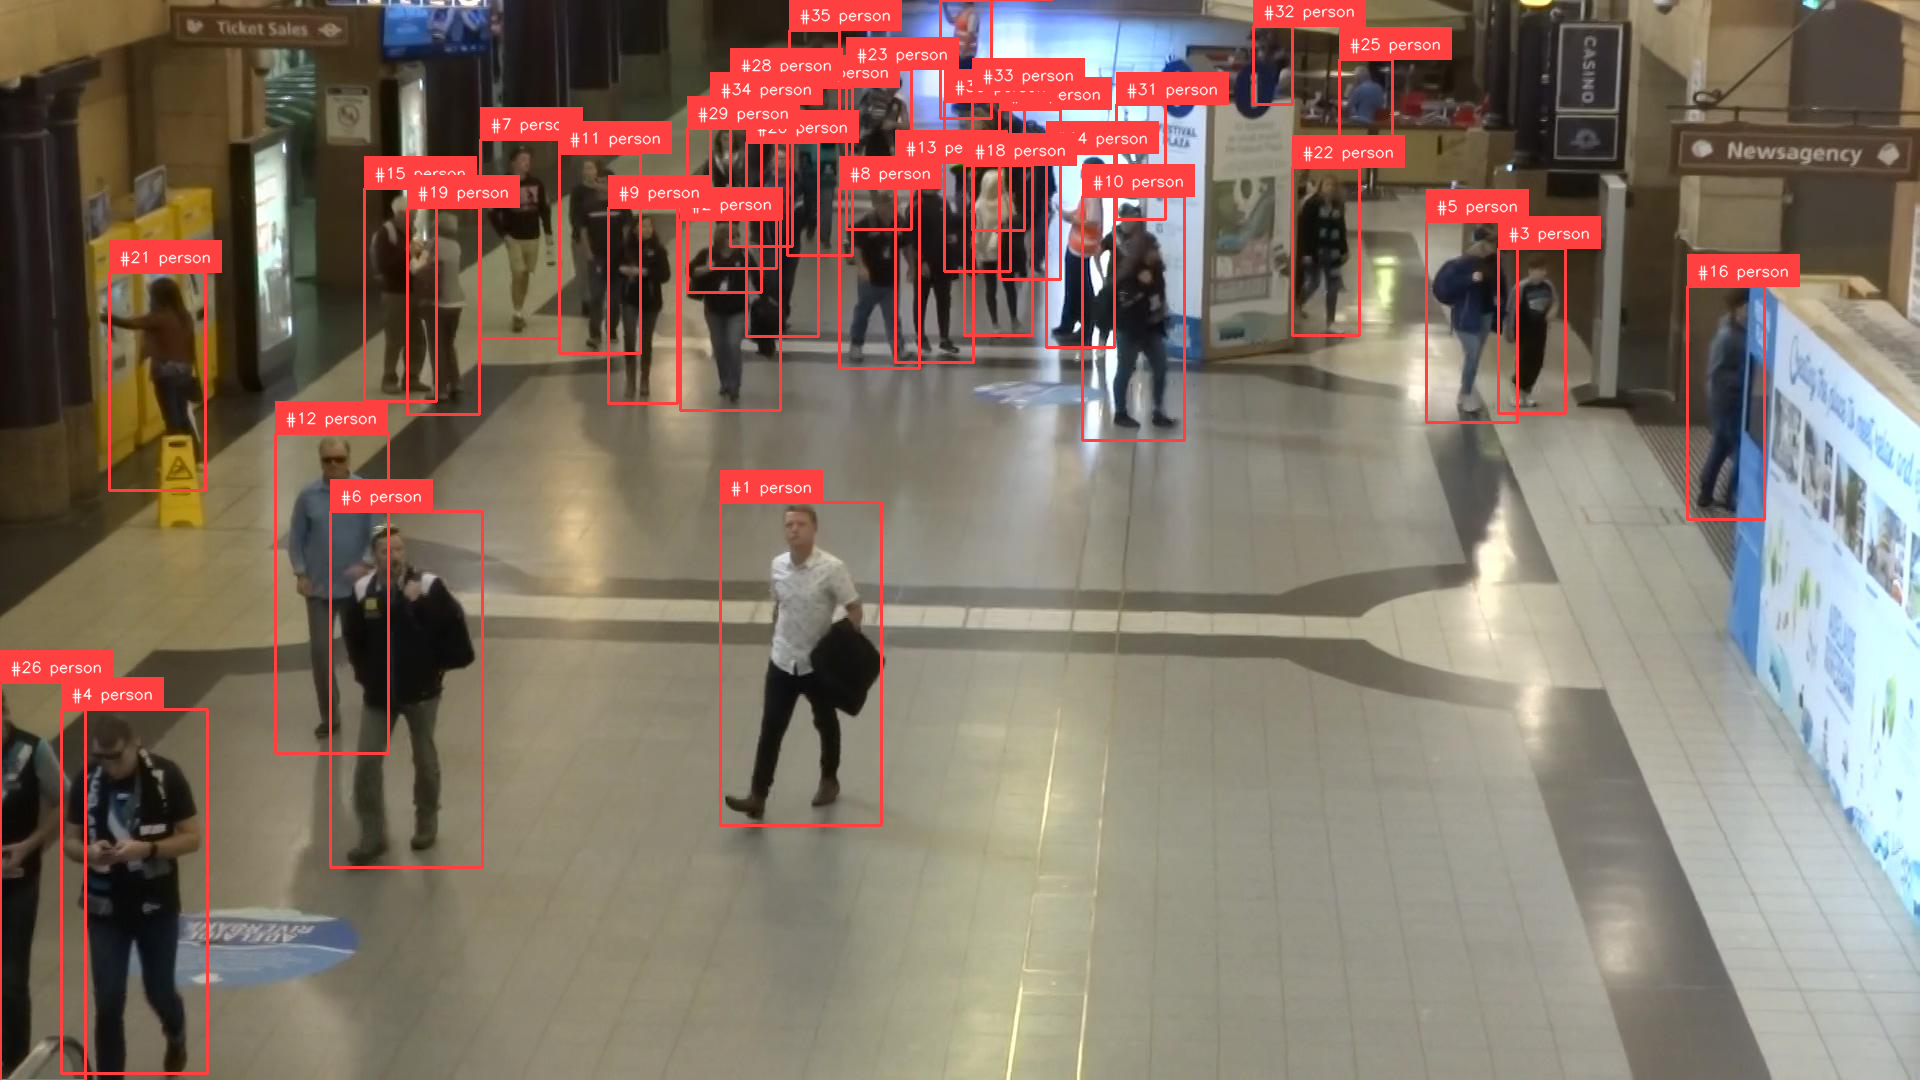

In [37]:
from FasterRcnn.tracking import *

image = get_frame()

tracker = sv.ByteTrack() # to track IDs

results = inference(model, image, device)
detections = get_detections_from_rcnn_results(results)
detections = tracker.update_with_detections(detections)
    
draw_rcnn_detections(detections, image)

In [43]:
sum(results[0]['scores'] > 0.5)

tensor(35, device='cuda:0')

In [47]:
len(df_train.query('vid == "02" & fnum == 1').query('`class` == 1 | `class` == 7'))

39